# Projeto de Análise de Vagas de Analista de Dados no LinkedIn


## Introdução

Este projeto visa realizar uma análise exploratória de dados relacionados a vagas de Analista de Dados disponíveis no LinkedIn. Utilizando técnicas de processamento de linguagem natural (NLP) e visualizações gráficas, buscamos extrair insights relevantes sobre os cargos, empresas, competências requeridas e outros aspectos relacionados.

## Definição do Problema

O mercado de trabalho para Analistas de Dados é dinâmico e competitivo. Com base nos dados coletados, pretendemos entender padrões, identificar as principais competências demandadas, analisar a distribuição geográfica das vagas e explorar outros fatores relevantes para os profissionais interessados nessa área.

## Metodologia

### 1. Importação de Bibliotecas

Nesta fase, importamos as bibliotecas necessárias e configuramos a conexão com o banco de dados contendo as informações das vagas.

In [1]:
from sqlalchemy import create_engine
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy
import re
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from unidecode import unidecode
from unicodedata import normalize
from collections import Counter

### 2. Configurações do Banco de Dados

In [3]:
# Configurações do banco de dados
db_user = 'root'
db_password = ''
db_host = 'localhost'
db_name = 'dados_linkind'
table_name = 'vagas_dados1'

# Criar a string de conexão
conn_str = f"mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}"

# Conectar ao banco de dados e carregar os dados
try:
    engine = create_engine(conn_str)
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, engine)
except Exception as e:
    print(f"Erro ao conectar ao banco de dados: {e}")

# 3. Tratamento dos dados

Realizando a limpeza e pré-processamento dos dados, removendo duplicatas, padronizando texto e extraindo informações relevantes, como a primeira palavra na descrição.

In [27]:
# Remover linhas duplicadas com base na coluna 'descricao'
df = df.drop_duplicates(subset=['descricao'])

# Função para remover acentos e converter para maiúsculas
def processar_texto(texto):
    texto_sem_acentos = normalize('NFKD', str(texto)).encode('ASCII', 'ignore').decode('ASCII')
    return texto_sem_acentos.upper()

# Aplicar a função apenas às colunas especificadas
colunas_a_processar = ['titulo', 'empresa', 'local1', 'informacoes', 'descricao', 'competencias', 'ramo']
df[colunas_a_processar] = df[colunas_a_processar].applymap(processar_texto)

# Função para extrair a primeira palavra
def extrair_primeira_palavra(texto):
    # Dividir a string em palavras e retornar a primeira
    palavras = str(texto).split()
    return palavras[0] if palavras else ''

# Extrair a primeira palavra na coluna 'local1'
df['local1'] = df['local1'].apply(extrair_primeira_palavra)


# 4. Analise Exploratória

Realizando análises sobre os títulos mais comuns, as empresas mais recorrentes, a distribuição de tipos de jornada, competências demandadas, ramos de atuação e as cidades com mais oportunidades.

### 4.1 Contagem de Cargos

In [ ]:
contagem_vagas_titulo = df['titulo'].value_counts()
print(contagem_vagas_titulo)

### 4.2 Contagem de Empresas

In [ ]:
contagem_vagas_empresa = df['empresa'].value_counts()
print(contagem_vagas_empresa)

### 4.3 Contagem de Tipo de Jornada

In [5]:
contagem_vagas_informacoes = df['informacoes'].value_counts()
print(contagem_vagas_informacoes)

informacoes
PRESENCIAL     155
HIBRIDO\nCO    149
REMOTO\nCOR     91
TEMPO INTE      30
R$ 6.500/M       1
Name: count, dtype: int64


### 4.4 Contagem de Competências

In [6]:
competencias_lista = df['competencias'].str.split(', ').explode()
contagem_vagas_competencias = competencias_lista.value_counts()
print(contagem_vagas_competencias)

competencias
BANCO DE DADOS                                     200
ANALISE DE DADOS                                   181
HABILIDADES ANALITICAS                             143
MINERACAO DE DADOS                                 138
CIENCIA DE DADOS                                   122
                                                  ... 
DESENVOLVIMENTO A EQUIPE DE VENDAS                   1
PESQUISA E TESTE A/B                                 1
SOLUCAO DE PROBLEMAS TECNICOS E SUPORTE TECNICO      1
QUERY LANGUAGES                                      1
MACRO                                                1
Name: count, Length: 611, dtype: int64


### 4.5 Contagem de Ramos de Atuação

In [7]:
contagem_vagas_ramo = df['ramo'].value_counts()
print(contagem_vagas_ramo)

ramo
DESENVOLVIMENTO DE SOFTWARE                                                    119
ATIVIDADES DOS SERVICOS DE TECNOLOGIA DA INFORMACAO                             49
NULL                                                                            34
ATIVIDADES DE SERVICOS FINANCEIROS                                              19
PUBLICIDADE E PROPAGANDA                                                        10
                                                                              ... 
TRANSPORTE RODOVIARIO DE CARGA                                                   1
SERVICOS DE ALIMENTACAO E BEBIDAS                                                1
FORNECIMENTO E GESTAO DE RECURSOS HUMANOS + DE                                   1
FABRICACAO DE COSMETICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL + DE       1
GESTAO DE INVESTIMENTOS EM APLICACOES FINANCEIRAS                                1
Name: count, Length: 93, dtype: int64


### 4.6 Cidades com Mais Vagas

In [28]:
contagem_vagas_local = df['local1'].value_counts()
print(contagem_vagas_local)

local1
SAO           178
BRASIL         43
RIO            25
BARUERI        15
CURITIBA       12
             ... 
FLORIANO        1
PONTA           1
VILA            1
UBERLANDIA      1
MARILIA         1
Name: count, Length: 68, dtype: int64


### 4.7 Análise de Palavras-Chave na Descrição

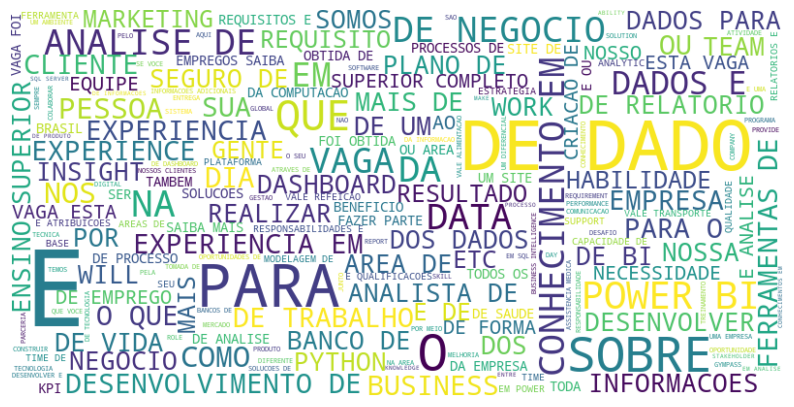

In [9]:
texto_completo = ' '.join(df['descricao'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(texto_completo)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 4.8 Análise de Tópicos (LDA)

In [10]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['descricao'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for i, topic in enumerate(lda.components_):
    print(f'Tópico #{i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print('\n')

Tópico #0:
['collaborate', 'management', 'assist', 'protocol', 'brasil', 'study', 'modec', 'materials', 'base', 'materiais']


Tópico #1:
['experiencia', 'sobre', 'conhecimento', 'vaga', 'que', 'da', 'com', 'para', 'dados', 'em']


Tópico #2:
['knowledge', 'analytics', 'support', 'skills', 'analysis', 'team', 'work', 'business', 'experience', 'data']


Tópico #3:
['um', 'na', 'dados', 'mais', 'uma', 'da', 'que', 'para', 'em', 'com']


Tópico #4:
['empregos', 'obtida', 'foi', 'datos', 'saiba', 'site', 'cargo', 'la', 'en', 'vaga']




### 4.9 Análise de Entidades Nomeadas

In [11]:
nlp = spacy.load('en_core_web_sm')

def extrair_entidades(texto):
    doc = nlp(texto)
    entidades = [entidade.text for entidade in doc.ents]
    return entidades

df['entidades'] = df['descricao'].apply(extrair_entidades)
display(df[['titulo', 'entidades']])

,titulo,entidades
0,BI ANALYST,"[DATA ANALYSIS, VISUALIZATION, ANALYSIS, CURIO..."
1,ANALISTA DE DADOS DE NEGOCIOS,"[KPIS, FOCUSED ON THE BEST, FOCUSED ON THE BUS..."
2,ANALISTA DE DADOS COMERCIAIS,"[FAZER PARTE DE UMA EQUIPE, DE PROCESSOS, MELH..."
3,ANALISTA DE DADOS SENIOR,"[DIA, DIA, FRENTES DE NEGOCIOS, SERVICOS FINAN..."
4,ANALISTA DE DADOS HOME OFFICE BRASIL,"[NOSSO NEGOCIOAQUI NA, 30 ANOS, NOS, SAO, DESE..."
...,...,...
469,ANALISTA DE ANALYTICS,"[EXCEL, LINGUAGEM DE PROGRAMACAO EM SQL, COM F..."
470,ANALISTA DE DADOS JUNIOR,"[REDE, VERIFICACAO DE DOCUMENTOS, COMPILACAO D..."
472,ANALISTA DE DADOS,"[ALEM DE CURSOS DE, ALIADA AO USO DE, DADOS SO..."
473,ANALISTA DE DADOS,"[2.500,00, EFETIVO, INFORMATICA, TI, SAO PAULO..."


### 4.10 Análise de Frequência de Palavras

Analisando a frequência de palavras nas descrições para identificar termos mais comuns, ajudando na compreensão das palavras chaves mais utilizadas.

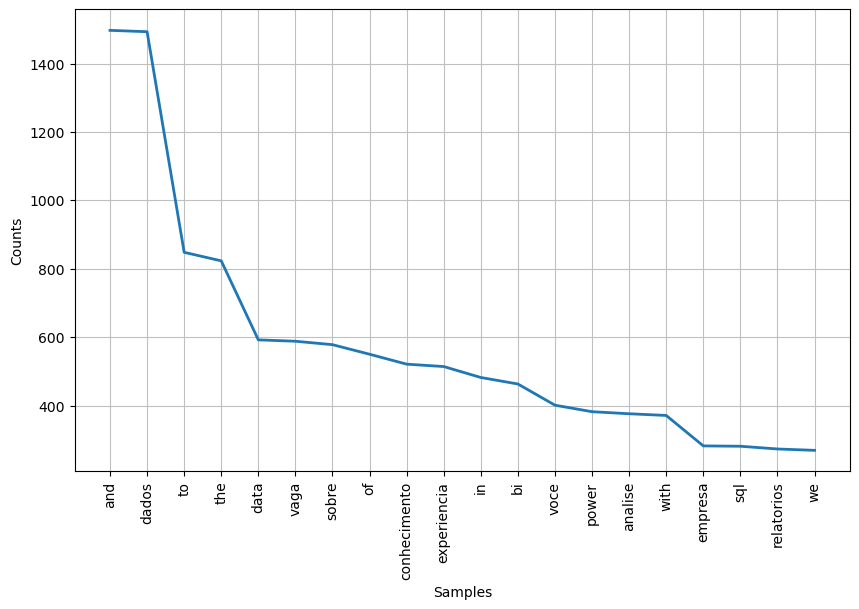

In [14]:
# Função para processar texto
def processar_texto(texto):
    tokens = word_tokenize(texto.lower())
    stop_words = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Aplicar a função à coluna de descrição
df['tokens'] = df['descricao'].apply(processar_texto)

# Análise de Frequência de Palavras
todos_tokens = [token for tokens_lista in df['tokens'] for token in tokens_lista]
freq_dist = FreqDist(todos_tokens)

# Plotar as 20 palavras mais frequentes
plt.figure(figsize=(10, 6))
freq_dist.plot(20, cumulative=False)
plt.show()

### 4.11 Visualizações Gráficas

Apresentando visualizações gráficas, incluindo barras e histogramas, para fornecer insights visuais sobre as principais tendências encontradas nos dados.

## Top 10 Cidades com mais vagas

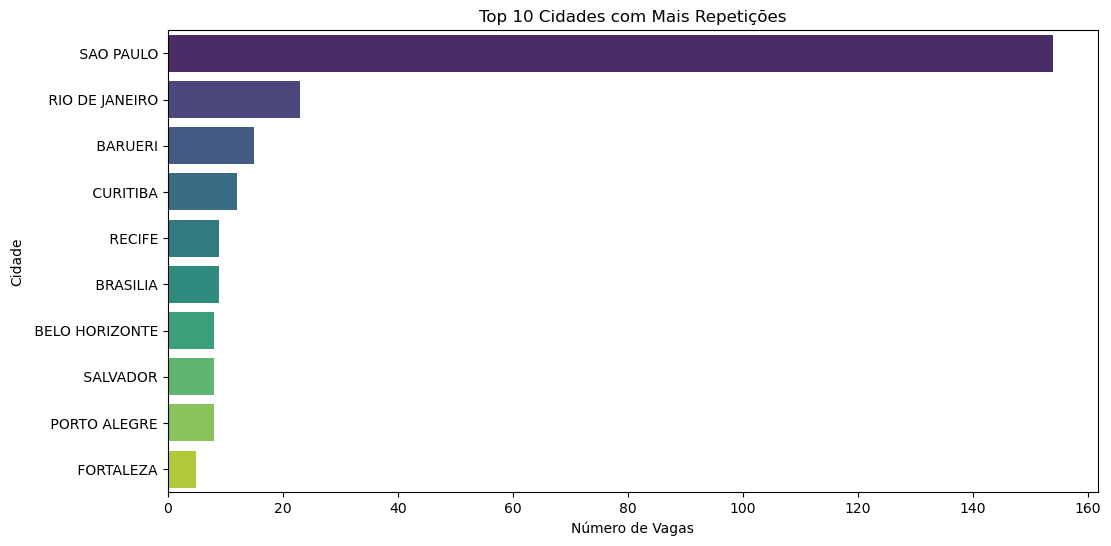

In [30]:
# Exemplos de visualizações gráficas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cidades.values, y=top_10_cidades.index, palette='viridis')
plt.xlabel('Número de Vagas')
plt.ylabel('Cidade')
plt.title('Top 10 Cidades com Mais Repetições')
plt.show()

# Distribuição do Modelo de trabalho

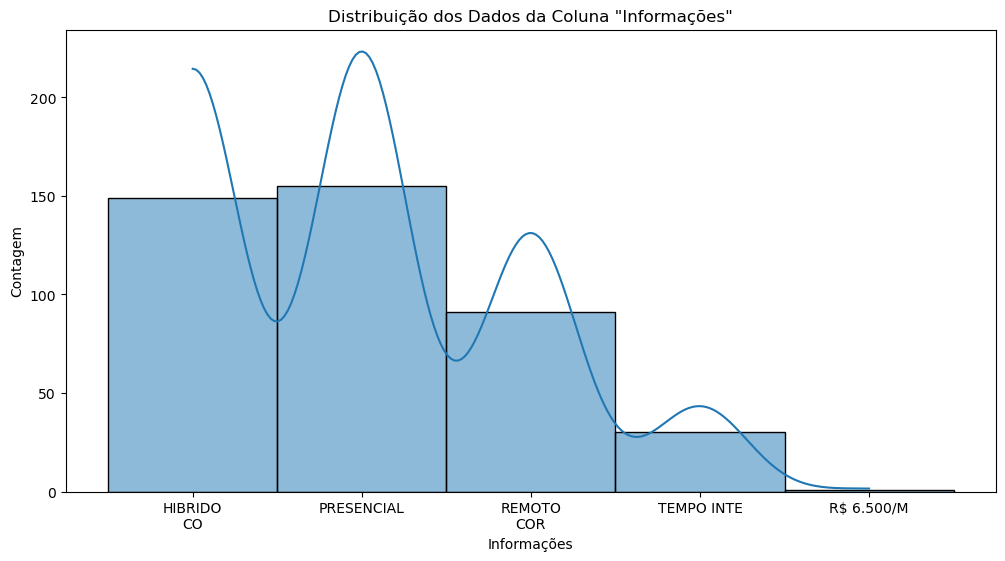

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['informacoes'], bins=20, kde=True)
plt.xlabel('Informações')
plt.ylabel('Contagem')
plt.title('Distribuição dos Dados da Coluna "Informações"')
plt.show()


# Top 10 Ramo de atuação com mais vagas

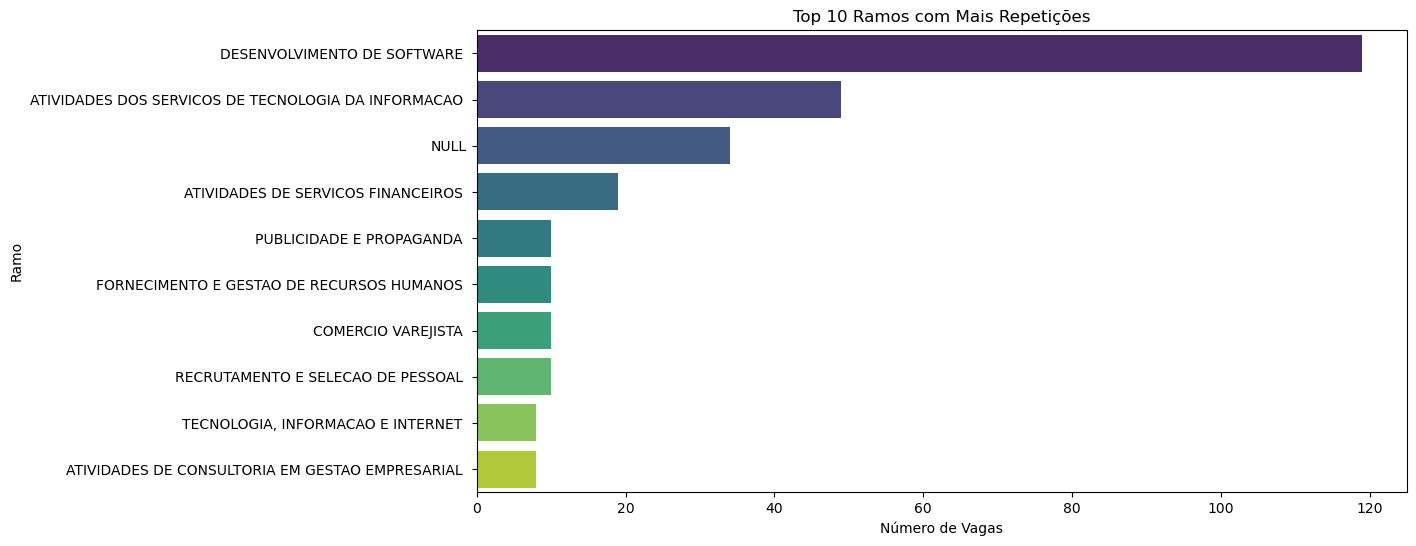

In [19]:
plt.figure(figsize=(12, 6))
top_10_ramos = df['ramo'].value_counts().nlargest(10)
sns.barplot(x=top_10_ramos.values, y=top_10_ramos.index, palette='viridis')
plt.xlabel('Número de Vagas')
plt.ylabel('Ramo')
plt.title('Top 10 Ramos com Mais Repetições')
plt.show()

# Top 10 Cargos com mais vagas

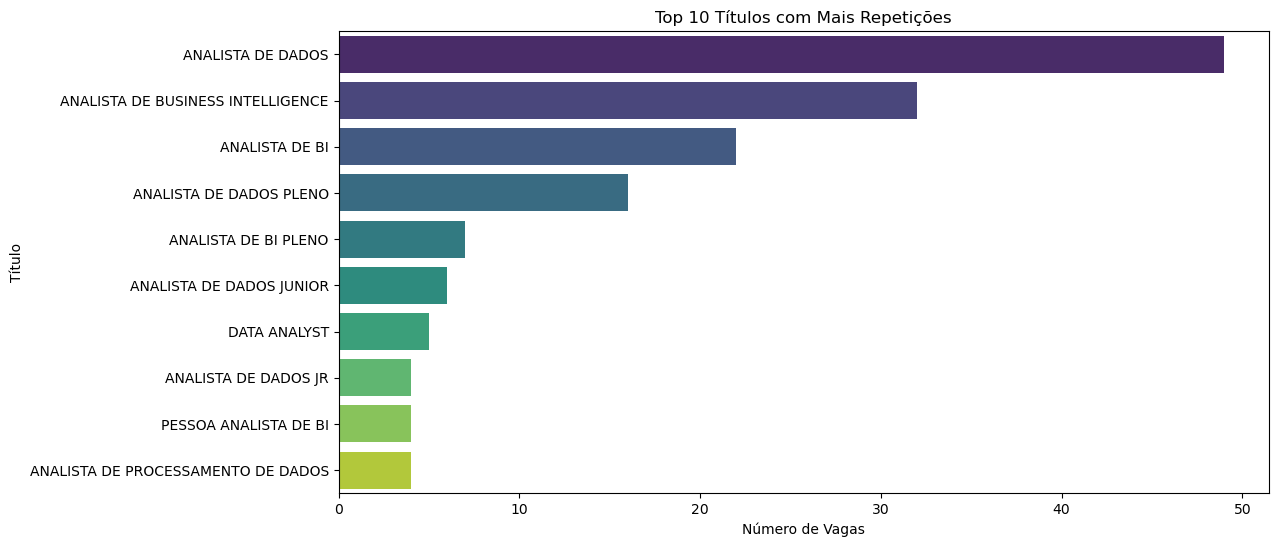

In [20]:
plt.figure(figsize=(12, 6))
top_10_titulos = df['titulo'].value_counts().nlargest(10)
sns.barplot(x=top_10_titulos.values, y=top_10_titulos.index, palette='viridis')
plt.xlabel('Número de Vagas')
plt.ylabel('Título')
plt.title('Top 10 Títulos com Mais Repetições')
plt.show()

# Top 20 Empresas com mais Vagas

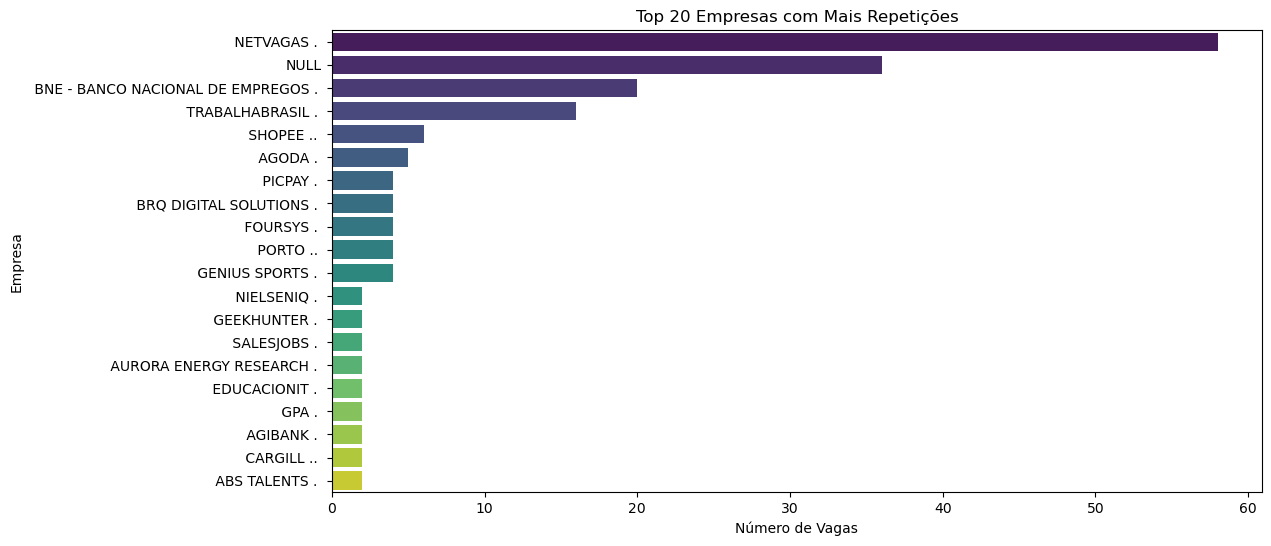

In [21]:
plt.figure(figsize=(12, 6))
top_20_empresas = df['empresa'].value_counts().nlargest(20)
sns.barplot(x=top_20_empresas.values, y=top_20_empresas.index, palette='viridis')
plt.xlabel('Número de Vagas')
plt.ylabel('Empresa')
plt.title('Top 20 Empresas com Mais Repetições')
plt.show()

# Top 25 Competências

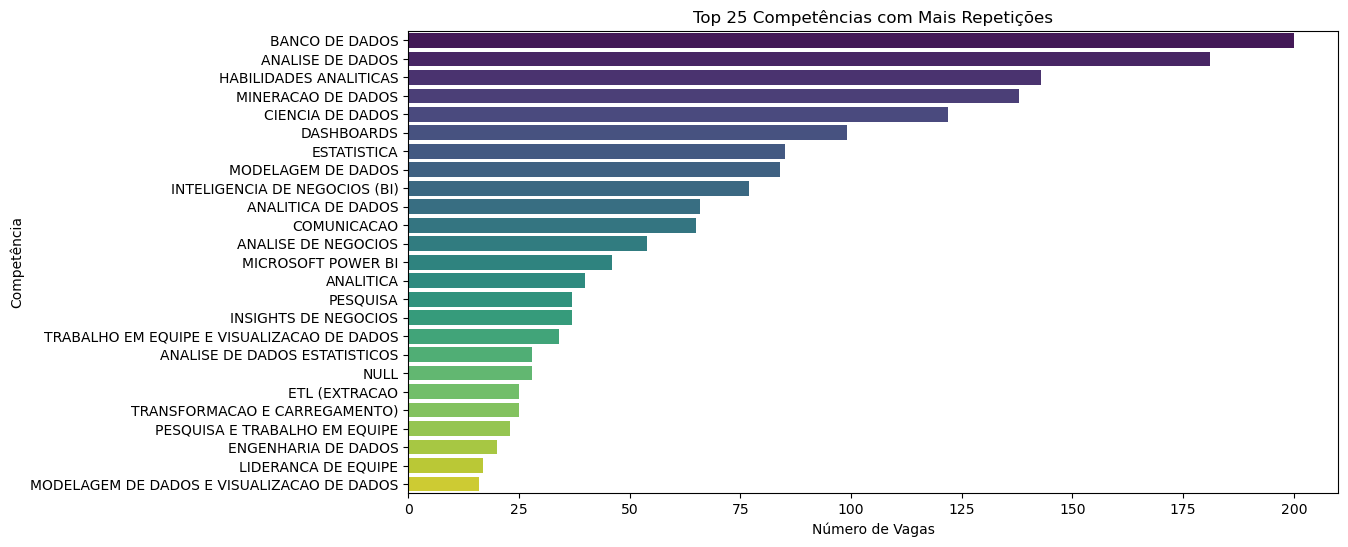

In [22]:
# Pegar as 25 competências mais frequentes
top_10_competencias = contagem_vagas_competencias.nlargest(25)
# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_competencias.values, y=top_10_competencias.index, palette='viridis')
plt.xlabel('Número de Vagas')
plt.ylabel('Competência')
plt.title('Top 25 Competências com Mais Repetições')
plt.show()

# Conclusão

Apesar de ainda estar em fase de desenvolvimento, os resultados preliminares apontam para algumas tendências interessantes no mercado de trabalho para Analistas de Dados. A análise exploratória e as visualizações proporcionam uma compreensão mais profunda dos requisitos e características dessas vagas.

# Próximos Passos

Continuarei refinando e expandindo este projeto, incorporando mais análises estatísticas, explorando correlações e, eventualmente, desenvolvendo modelos preditivos para prever tendências futuras no mercado de trabalho para Analistas de Dados.

Esse projeto é um trabalho em andamento, e novas análises e aprimoramentos serão adicionados ao longo do tempo.

Observação: As visualizações gráficas mencionadas (Top 10 Cidades, Distribuição do Modelo de Trabalho, etc.) ainda estão em desenvolvimento e serão adicionadas em futuras iterações do projeto.